# Objective

Here, we'll run through our training data to gather information and try to achieve the best possible model

In [42]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import csv
import pandas as pd
import time
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [72]:
# Functions

def addColumnThetaZero (array):
    return np.c_[np.ones(array.shape[0]), array]

def formatArray (dataFrame, columnToExtract) :
    array = dataFrame.values
    target = array[:,columnToExtract]
    params = np.delete(array, columnToExtract, axis = 1)
    return params, target

def loadFashionTrainData():
    return pd.read_csv("fashion-mnist-dataset/fashion-mnist_train.csv")

def loadFashionTestData():
    return pd.read_csv("fashion-mnist-dataset/fashion-mnist_test.csv")

def split_train_test(data, test_ratio):
    np.random.seed(42)
    test_set_size = int(len(data) * test_ratio)
    return data[:test_set_size], data[test_set_size:]
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

def regressionLogisticCostFunction (results, model, X):
    agaTheta = model.predict_proba(X)
#     print (agaTheta[:10])
#     print(results[:10])
    n = X.shape[0]
    diference = results - agaTheta
    squareDiference = diference * diference
    return (np.sum(squareDiference)/(2*n))

def createTarget (target):
    results = np.zeros((target.size, 10), dtype=int)
    for i in range(0,10):
        for j in range(target.size):
            if (target[j] != i):
                results[j][i] = 0
            else:
                results[j][i] = 1
    return results

def construct_confusion_matrix (results, model, X):
    confusion_matrix = np.zeros((10, 10), dtype=int)
    predicted = model.predict(X)
    n = X.shape[0]
    for i in range (n):
        confusion_matrix[results[i]][predicted[i]] = confusion_matrix[results[i]][predicted[i]] + 1
    return confusion_matrix
    
    

def accuracy (results, model, X):
    right_asnwer = 0
    predicted = model.predict(X)
    n = X.shape[0]
    for i in range (n):
        if (results[i][predicted[i]] == 1):
            right_asnwer = right_asnwer + 1
    return right_asnwer/n

# The dataset

First and foremost, we'll open train and test data. The training data is split to obtain validation items and the the target values are also separated from the original data. Also, added a column for Bias.


In [73]:
fashionTrainDataset = loadFashionTrainData()
fashionTestDataset = loadFashionTestData()

trainSet, validationSet = split_train_test(fashionTrainDataset, 0.2)

fashionTrainParams, fashionTrainTarget = formatArray(trainSet, 0)
fashionValidationSetParams, fashionValidationSetTarget = formatArray(validationSet, 0)
fashionTestParams, fashionTestTarget = formatArray (fashionTestDataset, 0)

trainTarget = createTarget(fashionTrainTarget)
validationTarget = createTarget(fashionValidationSetTarget)
testTarget = createTarget(fashionTestTarget)


fashionTrainParams = addColumnThetaZero(fashionTrainParams)
fashionValidationSetParams = addColumnThetaZero(fashionValidationSetParams)
fashionTestParams = addColumnThetaZero(fashionTestParams)

bestModel = LogisticRegression()
bestAccuracy = 0

In [45]:
# print (fashionTrainParams[2:3][:])
# print (fashionTrainTarget[:5])
xToPlotMultinomial_NCG = np.array([])
yToPlotMultinomial_NCG = np.array([])
y2ToPlotMultinomial_NCG = np.array([])

### Logistic Regression 1
- Multi-class choice: Multinomial
- Solver: Newton-CG
- Max Iteration: 10

In [46]:

xToPlotMultinomial_NCG4 = np.array([])
yToPlotMultinomial_NCG4 = np.array([])

penalt = 'l2'
solverMode = 'newton-cg'
maxIter = 20
multiClass = 'multinomial'

logisticMode = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode, penalty = penalt)

start = time.clock()
logisticMode.fit(fashionTrainParams, fashionTrainTarget)
print (time.clock() - start)

print("Score : "+ str(logisticMode.score(fashionValidationSetParams, fashionValidationSetTarget)))
print(metrics.accuracy_score(logisticMode.predict(fashionValidationSetParams), fashionValidationSetTarget))
print(metrics.precision_recall_fscore_support(logisticMode.predict(fashionValidationSetParams), fashionValidationSetTarget))

costFunction = regressionLogisticCostFunction(trainTarget, logisticMode, fashionTrainParams)
print (costFunction)

print ("GO TO AC")
r = accuracy (trainTarget, logisticMode, fashionTrainParams)
r2 = accuracy (validationTarget, logisticMode, fashionValidationSetParams)
print ("AC treino = ", r, " AC val = ", r2)

print ("MATRIX")
confusion_matrix = construct_confusion_matrix (fashionTrainTarget, logisticMode, fashionTrainParams)
print (confusion_matrix)

xToPlotMultinomial_NCG4 = np.append(xToPlotMultinomial_NCG4,maxIter)
yToPlotMultinomial_NCG4 = np.append(yToPlotMultinomial_NCG4,costFunction)

/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


35.037515999999414
Score : 0.789125
0.789125
(array([0.7354232 , 0.94390395, 0.67401607, 0.78378943, 0.66915114,
       0.85455303, 0.52148397, 0.89570164, 0.89481328, 0.91900377]), array([0.73327777, 0.93557653, 0.65947581, 0.78790424, 0.65332525,
       0.90429989, 0.54252072, 0.87397204, 0.91203214, 0.88814725]), array([0.73434891, 0.93972179, 0.66666667, 0.78584145, 0.6611435 ,
       0.87872295, 0.53179438, 0.88470343, 0.90334066, 0.90331208]), array([4799, 4874, 4960, 4762, 4947, 4535, 4586, 4864, 4729, 4944]))
0.03299838960339816
GO TO AC
AC treino =  0.9606666666666667  AC val =  0.789125
MATRIX
[[1160    0    5   12    1    0   37    0    0    0]
 [   0 1169    0    0    0    0    0    0    0    0]
 [   3    0 1023    4   78    0   39    0    0    0]
 [   4    0    2 1190    9    0    8    0    0    0]
 [   2    0   45   13 1068    0   42    0    0    0]
 [   0    0    0    0    0 1201    0    0    0    0]
 [  51    0   58    7   52    0 1061    0    0    0]
 [   0    0    0  

===== ITERACAO  1  =====
0.2499710000001869


/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


===== ITERACAO  2  =====
0.41091899999992165
===== ITERACAO  3  =====
0.7443519999997079
===== ITERACAO  4  =====
1.4270729999998366
===== ITERACAO  5  =====
1.954518000000462
===== ITERACAO  6  =====
2.6049629999997705
===== ITERACAO  7  =====
3.3608610000001136
===== ITERACAO  8  =====
4.479284000000007
===== ITERACAO  9  =====
6.1092420000004495
===== ITERACAO  10  =====
8.095194000000447
===== ITERACAO  11  =====
10.889694000000418
===== ITERACAO  12  =====
12.855180999999902
===== ITERACAO  13  =====
15.692804000000251
===== ITERACAO  14  =====
16.47621100000015
===== ITERACAO  15  =====
21.715492000000268
===== ITERACAO  16  =====
25.82501400000001
===== ITERACAO  17  =====
30.381985999999415
===== ITERACAO  18  =====
30.717313000000104
===== ITERACAO  19  =====
30.62825100000009
===== ITERACAO  20  =====
37.23301999999967
Fim Total:  266.27026399999977
Maior acuracia em:  8  com:  0.8410208333333333


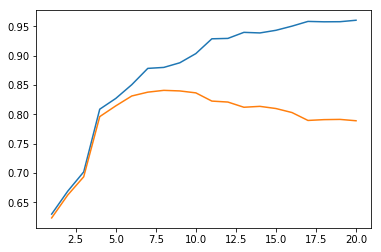

In [74]:
xToPlotMultinomial_NCG1 = np.array([])
yToPlotMultinomial_NCG1 = np.array([])
y2ToPlotMultinomial_NCG1 = np.array([])

penalt = 'l2'
solverMode = 'newton-cg'
multiClass = 'multinomial'

maxAccuracy = 0
iterMaxAccuracy = 0

startTotal = time.clock()

for i in range (1, 21):
    maxIter = i
    logisticModel1 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)
    print ("===== ITERACAO ", i, " =====")
    start = time.clock()
    logisticModel1.fit(fashionTrainParams, fashionTrainTarget)
    print (time.clock() - start)

    accuracyTrain = accuracy(trainTarget, logisticModel1, fashionTrainParams)
    accuracyValidation = accuracy(validationTarget, logisticModel1, fashionValidationSetParams)

    xToPlotMultinomial_NCG1 = np.append(xToPlotMultinomial_NCG1,maxIter)
    yToPlotMultinomial_NCG1 = np.append(yToPlotMultinomial_NCG1,accuracyTrain)
    y2ToPlotMultinomial_NCG1 = np.append(y2ToPlotMultinomial_NCG1,accuracyValidation)
    if (accuracyValidation > maxAccuracy):
        maxAccuracy = accuracyValidation
        iterMaxAccuracy = i
    if (accuracyValidation > bestAccuracy):
        bestAccuracy = accuracyValidation
        bestModel = logisticModel1
    
print ("Fim Total: ", time.clock() - startTotal)

plt.plot(xToPlotMultinomial_NCG1, yToPlotMultinomial_NCG1, xToPlotMultinomial_NCG1,y2ToPlotMultinomial_NCG1)
print ("Maior acuracia em: ", iterMaxAccuracy," com: ", maxAccuracy)

# Logistic Regression 3
- Multi-class choice: Multinomial
- Solver: Newton-CG
- Max Iteration: 500

===== ITERACAO  1  =====


/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.48069500000019616
===== ITERACAO  2  =====
1.0326990000003207
===== ITERACAO  3  =====
1.4570510000003196
===== ITERACAO  4  =====
2.1445889999995416
===== ITERACAO  5  =====
2.2377880000003643
===== ITERACAO  6  =====
2.73488400000042
===== ITERACAO  7  =====
3.3808639999997467
===== ITERACAO  8  =====
3.6133060000001933
===== ITERACAO  9  =====
4.04878699999972
===== ITERACAO  10  =====
4.734115000000202
===== ITERACAO  11  =====
4.996154999999817
===== ITERACAO  12  =====
5.287946999999804
===== ITERACAO  13  =====
5.884680000000117
===== ITERACAO  14  =====
6.21312399999988
===== ITERACAO  15  =====
6.860330000000431
===== ITERACAO  16  =====
7.19250699999975
===== ITERACAO  17  =====
7.8315440000005765
===== ITERACAO  18  =====
8.332080000000133
===== ITERACAO  19  =====
8.40312300000005
===== ITERACAO  20  =====
9.321592000000237
Fim Total:  100.54662600000029
Maior acuracia em:  12  com:  0.8410625


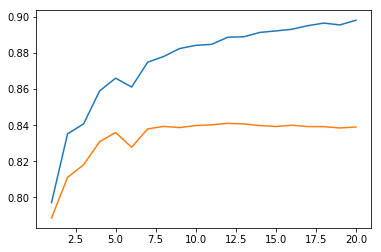

In [75]:
xToPlotMultinomial_NCG2 = np.array([])
yToPlotMultinomial_NCG2 = np.array([])
y2ToPlotMultinomial_NCG2 = np.array([])

penalt = 'l2'
solverMode = 'sag'
multiClass = 'multinomial'

maxAccuracy = 0
iterMaxAccuracy = 0

startTotal = time.clock()

for i in range (1, 21):
    maxIter = i
    logisticModel2 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)
    print ("===== ITERACAO ", i, " =====")
    start = time.clock()
    logisticModel2.fit(fashionTrainParams, fashionTrainTarget)
    print (time.clock() - start)

    accuracyTrain = accuracy(trainTarget, logisticModel2, fashionTrainParams)
    accuracyValidation = accuracy(validationTarget, logisticModel2, fashionValidationSetParams)

    xToPlotMultinomial_NCG2 = np.append(xToPlotMultinomial_NCG2,maxIter)
    yToPlotMultinomial_NCG2 = np.append(yToPlotMultinomial_NCG2,accuracyTrain)
    y2ToPlotMultinomial_NCG2 = np.append(y2ToPlotMultinomial_NCG2,accuracyValidation)
    if (accuracyValidation > maxAccuracy):
        maxAccuracy = accuracyValidation
        iterMaxAccuracy = i
    if (accuracyValidation > bestAccuracy):
        bestAccuracy = accuracyValidation
        bestModel = logisticModel2
  
print ("Fim Total: ", time.clock() - startTotal)

plt.plot(xToPlotMultinomial_NCG2, yToPlotMultinomial_NCG2, xToPlotMultinomial_NCG2,y2ToPlotMultinomial_NCG2)
print ("Maior acuracia em: ", iterMaxAccuracy," com: ", maxAccuracy)

===== ITERACAO  1  =====


/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7018260000004375
===== ITERACAO  2  =====
1.336472999999387
===== ITERACAO  3  =====
1.8160840000000462
===== ITERACAO  4  =====
2.8309300000000803
===== ITERACAO  5  =====
2.9184549999999945
===== ITERACAO  6  =====
3.839850999999726
===== ITERACAO  7  =====
4.373226000000614
===== ITERACAO  8  =====
4.641120000000228
===== ITERACAO  9  =====
5.26064899999983
===== ITERACAO  10  =====
5.9064739999994345
===== ITERACAO  11  =====
6.435285000000476
===== ITERACAO  12  =====
6.971136000000115
===== ITERACAO  13  =====
7.221928000000844
===== ITERACAO  14  =====
8.533219000000827
===== ITERACAO  15  =====
8.783027999999831
===== ITERACAO  16  =====
9.60479099999975
===== ITERACAO  17  =====
10.307706999999937
===== ITERACAO  18  =====
10.782286000001477
===== ITERACAO  19  =====
11.62268899999981
===== ITERACAO  20  =====
11.33205000000089
Fim Total:  129.51151599999957
Maior acuracia em:  16  com:  0.8418958333333333


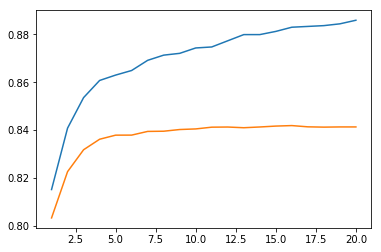

In [76]:

xToPlotMultinomial_NCG3 = np.array([])
yToPlotMultinomial_NCG3 = np.array([])
y2ToPlotMultinomial_NCG3 = np.array([])

penalt = 'l2'
solverMode = 'saga'
multiClass = 'multinomial'

maxAccuracy = 0
iterMaxAccuracy = 0

startTotal = time.clock()

for i in range (1, 21):
    maxIter = i
    logisticModel3 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)
    print ("===== ITERACAO ", i, " =====")
    start = time.clock()
    logisticModel3.fit(fashionTrainParams, fashionTrainTarget)
    print (time.clock() - start)

    accuracyTrain = accuracy(trainTarget, logisticModel3, fashionTrainParams)
    accuracyValidation = accuracy(validationTarget, logisticModel3, fashionValidationSetParams)

    xToPlotMultinomial_NCG3 = np.append(xToPlotMultinomial_NCG3,maxIter)
    yToPlotMultinomial_NCG3 = np.append(yToPlotMultinomial_NCG3,accuracyTrain)
    y2ToPlotMultinomial_NCG3 = np.append(y2ToPlotMultinomial_NCG3,accuracyValidation)
    if (accuracyValidation > maxAccuracy):
        maxAccuracy = accuracyValidation
        iterMaxAccuracy = i
    if (accuracyValidation > bestAccuracy):
        bestAccuracy = accuracyValidation
        bestModel = logisticModel3
   
print ("Fim Total: ", time.clock() - startTotal)

plt.plot(xToPlotMultinomial_NCG3, yToPlotMultinomial_NCG3, xToPlotMultinomial_NCG3,y2ToPlotMultinomial_NCG3)
print ("Maior acuracia em: ", iterMaxAccuracy," com: ", maxAccuracy)

===== ITERACAO  1  =====


/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


1.481713999999556
===== ITERACAO  2  =====
2.9210450000009587
===== ITERACAO  3  =====
4.31816599999911
===== ITERACAO  4  =====
5.829171999999744
===== ITERACAO  5  =====
7.384492000001046
===== ITERACAO  6  =====
8.907040000000052
===== ITERACAO  7  =====
10.571067000000767
===== ITERACAO  8  =====
12.190630999999485
===== ITERACAO  9  =====
14.047177999998894
===== ITERACAO  10  =====
15.985327000000325
===== ITERACAO  11  =====
17.922333000000435
===== ITERACAO  12  =====
20.231870999999956
===== ITERACAO  13  =====
22.939947999999276
===== ITERACAO  14  =====
25.538997999999992
===== ITERACAO  15  =====
28.576429999999164
===== ITERACAO  16  =====
31.203636000000188
===== ITERACAO  17  =====
34.06356400000004
===== ITERACAO  18  =====
38.679746999998315
===== ITERACAO  19  =====
41.71541799999977
===== ITERACAO  20  =====
46.3652860000002
Fim Total:  395.00561500000003
Maior acuracia em:  11  com:  0.8370833333333333


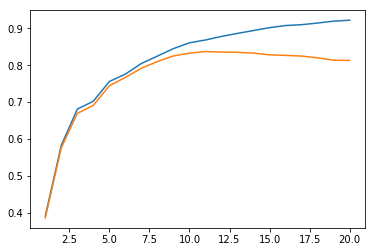

In [77]:

xToPlotMultinomial_NCG4 = np.array([])
yToPlotMultinomial_NCG4 = np.array([])
y2ToPlotMultinomial_NCG4 = np.array([])

penalt = 'l2'
solverMode = 'newton-cg'
multiClass = 'ovr'

maxAccuracy = 0
iterMaxAccuracy = 0

startTotal = time.clock()

for i in range (1, 21):
    maxIter = i
    logisticModel4 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)
    print ("===== ITERACAO ", i, " =====")
    start = time.clock()
    logisticModel4.fit(fashionTrainParams, fashionTrainTarget)
    print (time.clock() - start)

    accuracyTrain = accuracy(trainTarget, logisticModel4, fashionTrainParams)
    accuracyValidation = accuracy(validationTarget, logisticModel4, fashionValidationSetParams)

    xToPlotMultinomial_NCG4 = np.append(xToPlotMultinomial_NCG4,maxIter)
    yToPlotMultinomial_NCG4 = np.append(yToPlotMultinomial_NCG4,accuracyTrain)
    y2ToPlotMultinomial_NCG4 = np.append(y2ToPlotMultinomial_NCG4,accuracyValidation)
    if (accuracyValidation > maxAccuracy):
        maxAccuracy = accuracyValidation
        iterMaxAccuracy = i
    if (accuracyValidation > bestAccuracy):
        bestAccuracy = accuracyValidation
        bestModel = logisticModel4
    
print ("Fim Total: ", time.clock() - startTotal)

plt.plot(xToPlotMultinomial_NCG4, yToPlotMultinomial_NCG4, xToPlotMultinomial_NCG4,y2ToPlotMultinomial_NCG4)
print ("Maior acuracia em: ", iterMaxAccuracy," com: ", maxAccuracy)

# Logistic Regression 4
- Multi-class choice: Multinomial
- Solver: SAG
- Max Iteration: 10

===== ITERACAO  1  =====
0.7286199999998644
===== ITERACAO  2  =====
1.3707740000008926
===== ITERACAO  3  =====
1.9479730000002746
===== ITERACAO  4  =====
2.516352000000552
===== ITERACAO  5  =====
3.223764000000301
===== ITERACAO  6  =====
4.054543000000194
===== ITERACAO  7  =====
4.830899999999019
===== ITERACAO  8  =====
5.853350999999748
===== ITERACAO  9  =====
7.012829999999667
===== ITERACAO  10  =====
8.655174000001352
===== ITERACAO  11  =====
10.141150999999809
===== ITERACAO  12  =====
12.89460699999836
===== ITERACAO  13  =====
13.89878299999873
===== ITERACAO  14  =====
15.944342999999208
===== ITERACAO  15  =====
19.528008000001137
===== ITERACAO  16  =====
20.923494999999093
===== ITERACAO  17  =====
24.19607299999916
===== ITERACAO  18  =====
25.737418999999136
===== ITERACAO  19  =====
29.186271999999008
===== ITERACAO  20  =====
32.471378000000186
Fim Total:  249.34550499999932
Maior acuracia em:  9  com:  0.8361875


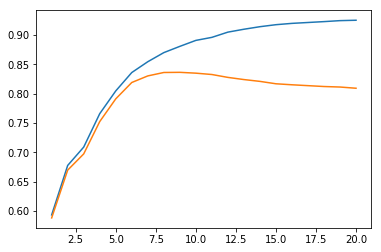

In [78]:

xToPlotMultinomial_NCG5 = np.array([])
yToPlotMultinomial_NCG5 = np.array([])
y2ToPlotMultinomial_NCG5 = np.array([])

penalt = 'l1'
solverMode = 'liblinear'
multiClass = 'ovr'

maxAccuracy = 0
iterMaxAccuracy = 0

startTotal = time.clock()

for i in range (1, 21):
    maxIter = i
    logisticModel5 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)
    print ("===== ITERACAO ", i, " =====")
    start = time.clock()
    logisticModel5.fit(fashionTrainParams, fashionTrainTarget)
    print (time.clock() - start)

    accuracyTrain = accuracy(trainTarget, logisticModel5, fashionTrainParams)
    accuracyValidation = accuracy(validationTarget, logisticModel5, fashionValidationSetParams)

    xToPlotMultinomial_NCG5 = np.append(xToPlotMultinomial_NCG5,maxIter)
    yToPlotMultinomial_NCG5 = np.append(yToPlotMultinomial_NCG5,accuracyTrain)
    y2ToPlotMultinomial_NCG5 = np.append(y2ToPlotMultinomial_NCG5,accuracyValidation)
    if (accuracyValidation > maxAccuracy):
        maxAccuracy = accuracyValidation
        iterMaxAccuracy = i
    if (accuracyValidation > bestAccuracy):
        bestAccuracy = accuracyValidation
        bestModel = logisticModel5
    
print ("Fim Total: ", time.clock() - startTotal)

plt.plot(xToPlotMultinomial_NCG5, yToPlotMultinomial_NCG5, xToPlotMultinomial_NCG5,y2ToPlotMultinomial_NCG5)
print ("Maior acuracia em: ", iterMaxAccuracy," com: ", maxAccuracy)

===== ITERACAO  1  =====


/home/igoromote/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8610630000002857
===== ITERACAO  2  =====
2.000123000001622
===== ITERACAO  3  =====
2.8352219999997033
===== ITERACAO  4  =====
3.643417999999656
===== ITERACAO  5  =====
4.366242000000057
===== ITERACAO  6  =====
5.180366000000504
===== ITERACAO  7  =====
6.283196999998836
===== ITERACAO  8  =====
6.95538999999917
===== ITERACAO  9  =====
7.826069000000643
===== ITERACAO  10  =====
8.481233999998949
===== ITERACAO  11  =====
9.487842000000455
===== ITERACAO  12  =====
10.24294700000064
===== ITERACAO  13  =====
11.960219000000507
===== ITERACAO  14  =====
11.878665999998702
===== ITERACAO  15  =====
12.499810000001162
===== ITERACAO  16  =====
13.59483899999941
===== ITERACAO  17  =====
14.911722000000736
===== ITERACAO  18  =====
15.644138999999996
===== ITERACAO  19  =====
15.87111399999958
===== ITERACAO  20  =====
17.10973699999886
Fim Total:  185.9788239999998
Maior acuracia em:  10  com:  0.8389166666666666


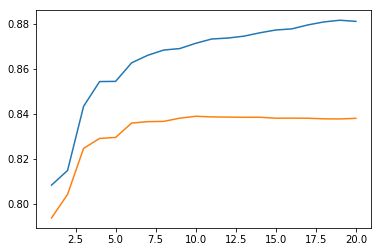

In [79]:

xToPlotMultinomial_NCG6 = np.array([])
yToPlotMultinomial_NCG6 = np.array([])
y2ToPlotMultinomial_NCG6 = np.array([])

penalt = 'l2'
solverMode = 'sag'
multiClass = 'ovr'

maxAccuracy = 0
iterMaxAccuracy = 0

startTotal = time.clock()

for i in range (1, 21):
    maxIter = i
    logisticModel6 = LogisticRegression(max_iter = maxIter, multi_class = multiClass, solver = solverMode)
    print ("===== ITERACAO ", i, " =====")
    start = time.clock()
    logisticModel6.fit(fashionTrainParams, fashionTrainTarget)
    print (time.clock() - start)

    accuracyTrain = accuracy(trainTarget, logisticModel6, fashionTrainParams)
    accuracyValidation = accuracy(validationTarget, logisticModel6, fashionValidationSetParams)

    xToPlotMultinomial_NCG6 = np.append(xToPlotMultinomial_NCG6,maxIter)
    yToPlotMultinomial_NCG6 = np.append(yToPlotMultinomial_NCG6,accuracyTrain)
    y2ToPlotMultinomial_NCG6 = np.append(y2ToPlotMultinomial_NCG6,accuracyValidation)
    if (accuracyValidation > maxAccuracy):
        maxAccuracy = accuracyValidation
        iterMaxAccuracy = i
    if (accuracyValidation > bestAccuracy):
        bestAccuracy = accuracyValidation
        bestModel = logisticModel6
    
print ("Fim Total: ", time.clock() - startTotal)

plt.plot(xToPlotMultinomial_NCG6, yToPlotMultinomial_NCG6, xToPlotMultinomial_NCG6,y2ToPlotMultinomial_NCG6)
print ("Maior acuracia em: ", iterMaxAccuracy," com: ", maxAccuracy)

In [89]:
print("Score : "+ str(bestModel.score(fashionTestParams, fashionTestTarget)))
print(metrics.accuracy_score(bestModel.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(bestModel.predict(fashionTestParams), fashionTestTarget))

costFunction = regressionLogisticCostFunction(testTarget, bestModel, fashionTestParams)
print (costFunction)



print ("MATRIX")
confusion_matrix = construct_confusion_matrix (fashionTestTarget, bestModel, fashionTestParams)
print (confusion_matrix)

print (fashionTestTarget.shape)


Score : 0.8425
0.8425
(array([0.799, 0.972, 0.729, 0.87 , 0.799, 0.869, 0.579, 0.912, 0.942,
       0.954]), array([0.79265873, 0.95952616, 0.7771855 , 0.85043988, 0.73302752,
       0.94353963, 0.63626374, 0.89587426, 0.92991115, 0.89493433]), array([0.79581673, 0.9657228 , 0.75232198, 0.86010875, 0.7645933 ,
       0.90473712, 0.60628272, 0.90386521, 0.93591654, 0.92352372]), array([1008, 1013,  938, 1023, 1090,  921,  910, 1018, 1013, 1066]))
0.1137627752878607
MATRIX
[[799  11  12  44   6   0 103   0  24   1]
 [  1 972   5  17   0   1   4   0   0   0]
 [ 19   1 729  12 127   0 102   0  10   0]
 [ 30  23  10 870  43   0  21   0   3   0]
 [  0   1  74  37 799   0  85   0   4   0]
 [  2   0   0   1   0 869   0  66  12  50]
 [153   5  99  36 110   1 579   0  17   0]
 [  0   0   0   0   0  28   0 912   0  60]
 [  4   0   9   6   5  11  16   6 942   1]
 [  0   0   0   0   0  11   0  34   1 954]]
(10000,)


In [38]:

fashionTestParams, fashionTestTarget = formatArray (fashionTestDataset, 0)
fashtionTestTargetFormated = createTarget(fashionTestTarget)
fashionTestParams = addColumnThetaZero(fashionTestParams)

testCostFunction1 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel, fashionTestParams)
testCostFunction2 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel2, fashionTestParams)
testCostFunction3 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel3, fashionTestParams)
testCostFunction4 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel4, fashionTestParams)
testCostFunction5 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel5, fashionTestParams)
testCostFunction7 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel7, fashionTestParams)
testCostFunction8 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel8, fashionTestParams)
testCostFunction10 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel10, fashionTestParams)
testCostFunction11 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel11, fashionTestParams)
testCostFunction13 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel13, fashionTestParams)
testCostFunction14 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel14, fashionTestParams)
print ("Custo e acurácia 1:")
print (testCostFunction1)
print(metrics.accuracy_score(logisticModel.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 2:")
print (testCostFunction2)
print(metrics.accuracy_score(logisticModel2.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel2.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 3:")
print (testCostFunction3)
print(metrics.accuracy_score(logisticModel3.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel3.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 4:")
print (testCostFunction4)
print(metrics.accuracy_score(logisticModel4.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel4.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 5:")
print (testCostFunction5)
print(metrics.accuracy_score(logisticModel5.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel5.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 7:")
print (testCostFunction7)
print(metrics.accuracy_score(logisticModel7.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel7.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 8:")
print (testCostFunction8)
print(metrics.accuracy_score(logisticModel8.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel8.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 10:")
print (testCostFunction10)
print(metrics.accuracy_score(logisticModel10.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel10.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 11:")
print (testCostFunction11)
print(metrics.accuracy_score(logisticModel11.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel11.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 13:")
print (testCostFunction13)
print(metrics.accuracy_score(logisticModel13.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel13.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 14:")
print (testCostFunction14)
print(metrics.accuracy_score(logisticModel14.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel14.predict(fashionValidationSetParams), fashionValidationSetTarget))

Custo e acurácia 1:
0.8856784461175559
0.8518
(array([0.80844156, 0.95741056, 0.76583333, 0.8784219 , 0.77552743,
       0.90184049, 0.59292035, 0.94689542, 0.95213229, 0.95289256]), array([0.81639344, 0.96315338, 0.76328904, 0.84639255, 0.72476341,
       0.9440367 , 0.65921288, 0.91838352, 0.94391717, 0.9427637 ]), array([0.81239804, 0.96027339, 0.76455907, 0.86210984, 0.74928659,
       0.9224563 , 0.62431173, 0.93242156, 0.94800693, 0.94780107]), array([1220, 1167, 1204, 1289, 1268, 1090, 1118, 1262, 1159, 1223]))
Custo e acurácia 2:
0.9095479120806638
0.8323
(array([0.79788961, 0.95655877, 0.75166667, 0.84782609, 0.76371308,
       0.89833479, 0.5695897 , 0.91666667, 0.91122715, 0.92066116]), array([0.78202068, 0.92276089, 0.75734677, 0.83704293, 0.73160873,
       0.90788308, 0.63554758, 0.90048154, 0.90727903, 0.93065998]), array([0.78987545, 0.93935592, 0.75449603, 0.8424    , 0.74731627,
       0.9030837 , 0.60076368, 0.90850202, 0.90924881, 0.92563357]), array([1257, 1217, 11

In [54]:
testCostFunction1 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel, fashionTestParams)
testCostFunction2 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel2, fashionTestParams)
testCostFunction3 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel3, fashionTestParams)
testCostFunction4 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel4, fashionTestParams)
testCostFunction5 = regressionLogisticCostFunction(fashtionTestTargetFormated, logisticModel5, fashionTestParams)

print ("Custo e acurácia 1:")
print (testCostFunction1)
print(metrics.accuracy_score(logisticModel.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 2:")
print (testCostFunction2)
print(metrics.accuracy_score(logisticModel2.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel2.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 3:")
print (testCostFunction3)
print(metrics.accuracy_score(logisticModel3.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel3.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 4:")
print (testCostFunction4)
print(metrics.accuracy_score(logisticModel4.predict(fashionTestParams), fashionTestTarget))
print(metrics.precision_recall_fscore_support(logisticModel4.predict(fashionValidationSetParams), fashionValidationSetTarget))
print ("Custo e acurácia 5:")
print (testCostFunction5)

NameError: name 'fashtionTestTargetFormated' is not defined

In [81]:
accuracyTest = accuracy(testTarget, bestModel, fashionTestParams)

In [82]:
print(accuracyTest)

0.8425


In [83]:
validationTest = accuracy(validationTarget, bestModel, fashionValidationSetParams)

In [84]:
print(validationTest)

0.8418958333333333
